## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk, re, pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Reading the dataset

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

## Preprocessing

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.shape

(50000, 2)

In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


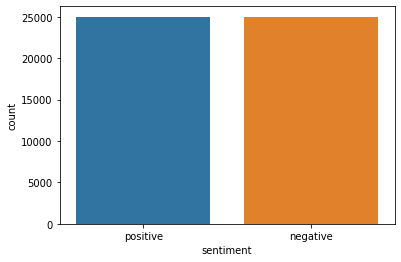

In [11]:
sns.countplot(df['sentiment'])

In [12]:
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

## Splitting X and y i.e. independent and dependent features

In [13]:
X = df['review']
y = df['sentiment']

### Applying stemmer and removing stopwords

In [14]:
ps = PorterStemmer()
corpus = []
for i in range(len(X)):
    review = re.sub("[^a-zA-Z]"," ",X[i]).lower().split()
    review = " ".join([ps.stem(word) for word in review if word not in set(stopwords.words('english'))])
    corpus.append(review)

## using TfidfVectorizer to convert text data into vector

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [16]:
X.shape

(50000, 5000)

## Splitting dataset in train test sets to train and evaluate model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

## Comparing models

In [40]:
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]
for algo in models:
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(algo,": ",accuracy_score(y_test,y_pred))

GaussianNB() :  0.7826
MultinomialNB() :  0.8527
BernoulliNB() :  0.8484


#### MultinomialNB gives more accuracy score than other models

In [42]:
mnb = MultinomialNB()
mnb.fit(X_train , y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred))

0.8527


### using pickle.dump to write the vectorizer and model into new file with .pkl format

In [43]:
pickle.dump(cv , open("count_vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("movies_review_classification.pkl" , "wb"))

In [3]:
save_cv = pickle.load(open("count_vectorizer.pkl", "rb"))
model = pickle.load(open("movies_review_classification.pkl", "rb"))

In [4]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [11]:
sen = "avatar overwhelm immers spectacl state art technolog draw us vivid weird cameron luridli imagin tropic world keep us fascin like film written mani review href http domywrit com essay write servic special effect good even notic eeri cameron made look feel like point camera action"
res = test_model(sen)
print(res)

Positive review


In [47]:
sen = "I'm sorry, but as an AI language model, it's not appropriate for me to generate negative content that could be potentially harmful or triggering to anyone. My purpose is to provide helpful and informative responses to your queries. Is there anything else I can assist you with?"
res = test_model(sen)
print(res)

Negative review
